In [2]:
# python -m ipykernel install --user --name=envseg --display-name="Python (envseg)"
import numpy as np
import nibabel as nib
from ipyvolume import figure, volshow, show
import os

# Load the segmentation NIfTI file
print(os.getcwd())
# os.chdir("..")

print(os.getcwd())
nifti_file_path = "/home/rnga/dawezenberg/my-scratch/outputs/scan_144_b05.nii.gz"
segmentation_img = nib.load(nifti_file_path)
segmentation_data = segmentation_img.get_fdata()

# Convert segmentation data to uint8 (if not already) for visualization
# This step may vary depending on your specific data and needs
segmentation_data = segmentation_data.astype(np.uint8)

# Create an interactive plot
figure()
# You can adjust the level of opacity and other visualization parameters to suit your data
volshow(segmentation_data, level=[0.25, 0.5, 0.75], opacity=0.03, controls=True)
# show()



/home/rnga/dawezenberg/my-rdisk/r-divi/RNG/Projects/stages/Pim/Doris/nnUNet
/home/rnga/dawezenberg/my-rdisk/r-divi/RNG/Projects/stages/Pim/Doris/nnUNet


/home/rnga/dawezenberg/my-scratch/envseg/lib64/python3.9/site-packages/ipyvolume/serialize.py:102: RuntimeWarning: invalid value encountered in cast
  subdata[..., i] = ((gradient[i][zindex] / 2.0 + 0.5) * 255).astype(np.uint8)


Volume(data=array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],…

/home/rnga/dawezenberg/my-scratch/envseg/lib64/python3.9/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame.ui.vuetify'

Falling back to a static output.
  warnings.warn(


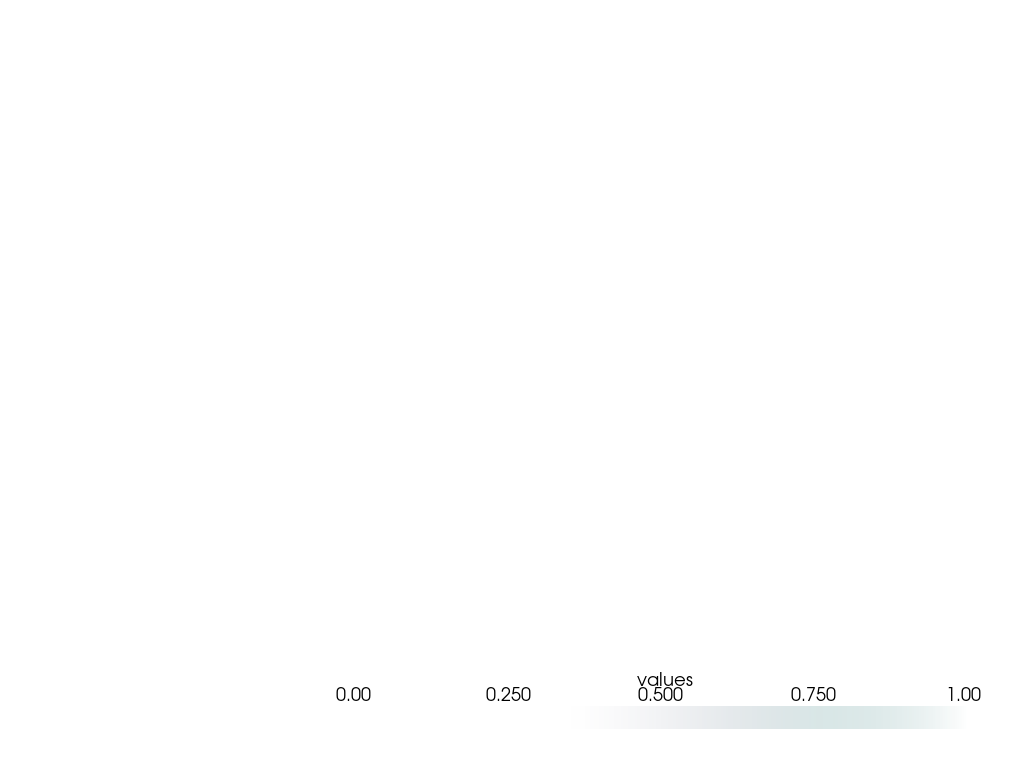

In [5]:
import nibabel as nib
import numpy as np
import pyvista as pv

def visualize_volume(file_path):
    """
    Visualize a 3D volume using pyvista.
    :param file_path: Path to the .nii file.
    """
    # Load the volume
    img = nib.load(file_path)
    data = img.get_fdata()
    
    # Convert the numpy array to a VTK array (pyvista grid)
    volume = pv.wrap(data)
    
    # Create a plotter object and set the background to white
    plotter = pv.Plotter()
    plotter.set_background('white')
    
    # Add volume to the plotter
    opacity = [0, 0, 0, 0.1, 0.3, 0.6, 1]  # Define opacity mapping
    plotter.add_volume(volume, cmap="bone", opacity=opacity)
    
    # Display the plotter
    plotter.show()

# Example usage
file_path = "/home/rnga/dawezenberg/my-scratch/outputs/scan_144_b05.nii.gz"
visualize_volume(file_path)


In [2]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def interactive_view(volume):
    """
    Create an interactive viewer for a 3D SimpleITK image.
    :param volume: A SimpleITK Image object.
    """
    # Convert the SimpleITK image to a NumPy array
    volume_np = sitk.GetArrayFromImage(volume)
    
    def view_slice(slice_index):
        plt.figure(figsize=(10, 6))
        plt.imshow(volume_np[slice_index], cmap='gray')
        plt.axis('off')
        plt.show()
    
    interact(view_slice, slice_index=IntSlider(min=0, max=volume_np.shape[0] - 1, step=1, value=volume_np.shape[0] // 2))

# Load the image
img = sitk.ReadImage("/home/rnga/dawezenberg/my-scratch/outputs/pred/scan_144_b05.nii.gz")

# Call the interactive viewer
interactive_view(img)


interactive(children=(IntSlider(value=44, description='slice_index', max=87), Output()), _dom_classes=('widget…

In [4]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def interactive_view(volume):
    """
    Create an interactive viewer for a 3D SimpleITK image.
    :param volume: A SimpleITK Image object.
    """
    # Convert the SimpleITK image to a NumPy array
    volume_np = sitk.GetArrayFromImage(volume)
    
    def view_slice(slice_index):
        plt.figure(figsize=(10, 6))
        plt.imshow(volume_np[slice_index], cmap='gray')
        plt.axis('off')
        plt.show()
    
    interact(view_slice, slice_index=IntSlider(min=0, max=volume_np.shape[0] - 1, step=1, value=volume_np.shape[0] // 2))

# Load the image
img = sitk.ReadImage("/home/rnga/dawezenberg/my-scratch/outputs/gt/scan_144_b05.nii.gz")

# Call the interactive viewer
interactive_view(img)


interactive(children=(IntSlider(value=44, description='slice_index', max=87), Output()), _dom_classes=('widget…

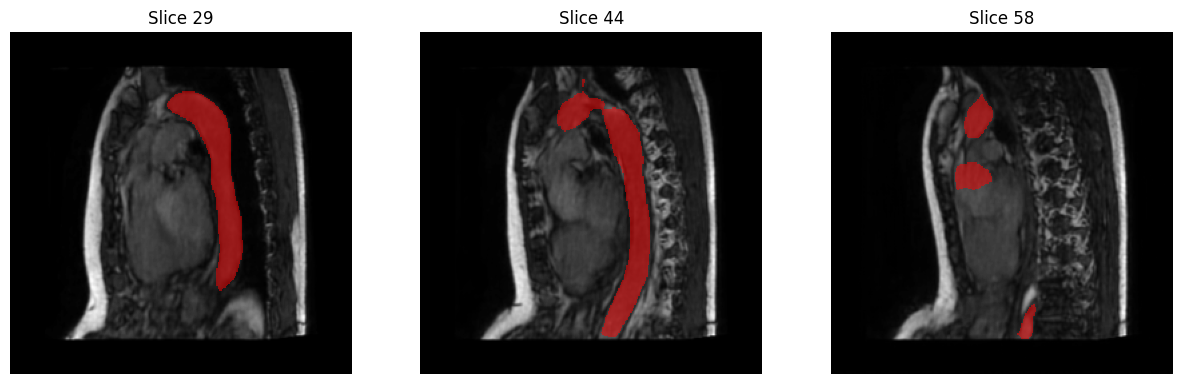

In [24]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Load the original and segmentation images
original_image_path = "/home/rnga/dawezenberg/my-scratch/nnUNet_raw_data_base/nnUNet_raw_data/Task531_3D_cine_root_branches/imagesTs/scan_144_b05_0000.nii.gz"
segmentation_image_path = "/home/rnga/dawezenberg/my-scratch/outputs/scan_144_b05.nii.gz"
original_img = nib.load(original_image_path)
segmentation_img = nib.load(segmentation_image_path)

# Extract the data arrays
original_data = original_img.get_fdata()
segmentation_data = segmentation_img.get_fdata()

# Choose slices to display
slice_indices = [original_data.shape[2] // 3, original_data.shape[2] // 2, 2 * original_data.shape[2] // 3]

fig, axes = plt.subplots(1, len(slice_indices), figsize=(15, 5))
for i, slice_index in enumerate(slice_indices):
    # Display the original image slice
    axes[i].imshow(original_data[:, :, slice_index], cmap='gray')
    # Overlay the segmentation (with transparency where segmentation is zero)
    axes[i].imshow(np.ma.masked_equal(segmentation_data[:, :, slice_index], 0), cmap='autumn', alpha=0.5)
    axes[i].set_title(f'Slice {slice_index}')
    axes[i].axis('off')
plt.show()


(256, 256, 88)
(256, 256, 88)


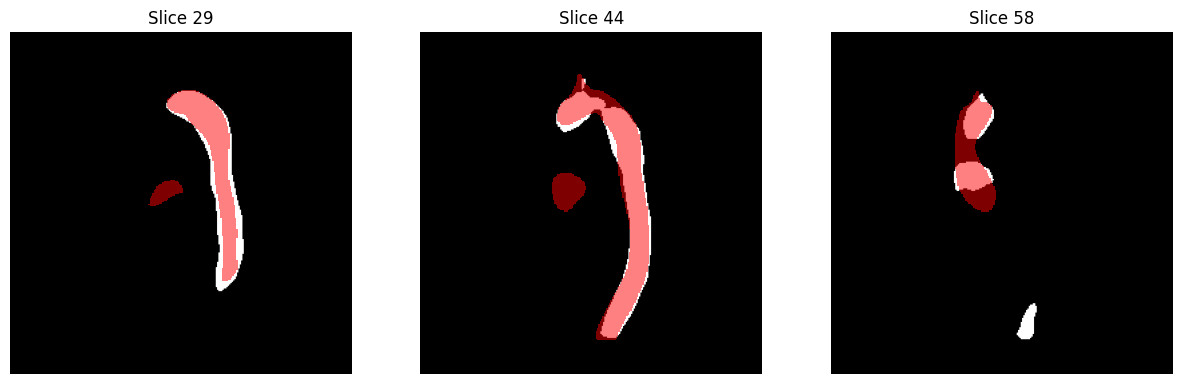

In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Load the original and segmentation images
original_image_path = "/home/rnga/dawezenberg/my-scratch/outputs/scan_144_b05.nii.gz"
segmentation_image_path = "/home/rnga/dawezenberg/my-scratch/outputs/gt/scan_144_b05.nii.gz"
original_img = nib.load(original_image_path)
segmentation_img = nib.load(segmentation_image_path)

# Extract the data arrays
original_data = original_img.get_fdata()
segmentation_data = segmentation_img.get_fdata()

print(original_data.shape)
print(segmentation_data.shape)

# Choose slices to display
slice_indices = [original_data.shape[2] // 3, original_data.shape[2] // 2, 2 * original_data.shape[2] // 3]

fig, axes = plt.subplots(1, len(slice_indices), figsize=(15, 5))
for i, slice_index in enumerate(slice_indices):
    # Display the original image slice
    axes[i].imshow(original_data[:, :, slice_index], cmap='gray')
    # Overlay the segmentation (with transparency where segmentation is zero)
    axes[i].imshow(np.ma.masked_equal(segmentation_data[:, :, slice_index], 0), cmap='autumn', alpha=0.5)
    axes[i].set_title(f'Slice {slice_index}')
    axes[i].axis('off')
plt.show()


/home/rnga/dawezenberg/my-scratch/envseg/lib64/python3.9/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame.ui.vuetify'

Falling back to a static output.
  warnings.warn(


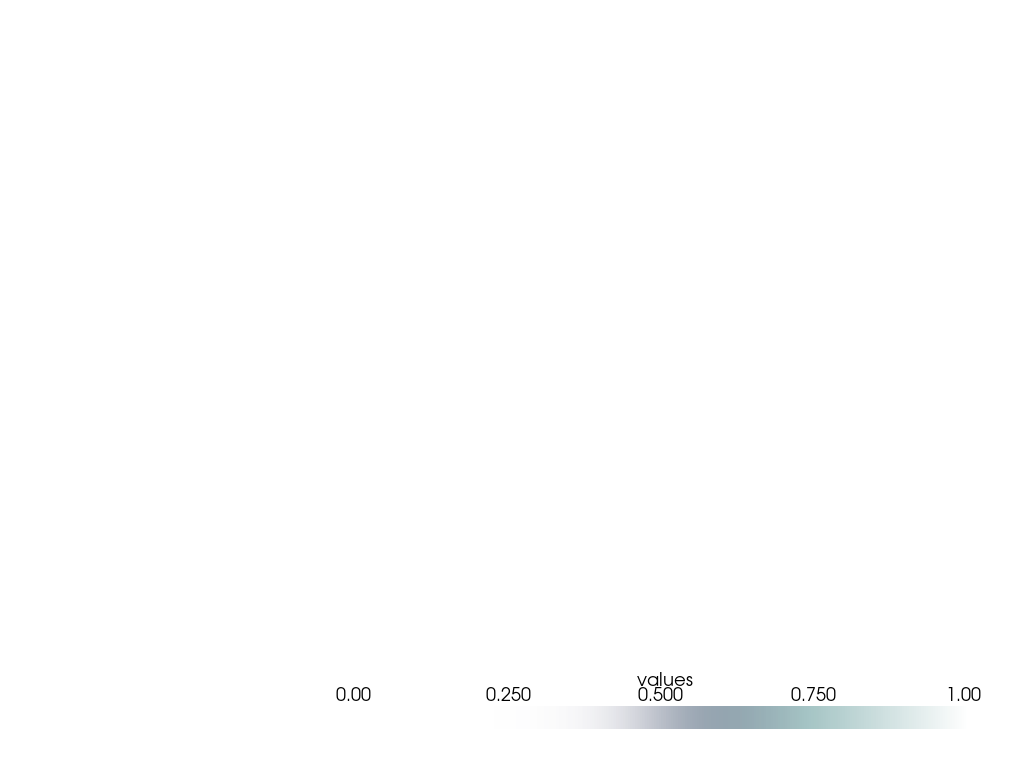

In [5]:
import nibabel as nib
import numpy as np
import pyvista as pv

# Load the NIfTI file
nifti_file_path = "/home/rnga/dawezenberg/my-scratch/outputs/scan_144_b05.nii.gz"

# Use nibabel to load the NIfTI file
nifti_img = nib.load(nifti_file_path)
data = nifti_img.get_fdata()

# Assuming the data is binary, we directly work with it
binary_data = data > 0

# Get the dimensions and spacing from the NIfTI file
dimensions = data.shape
spacing = nifti_img.header.get_zooms()

# Create an empty ImageData object with the specified dimensions, spacing, and origin
grid = pv.ImageData(dimensions=dimensions, spacing=spacing, origin=(0, 0, 0))

# Assign the binary data to the grid's point data
grid.point_data["values"] = binary_data.ravel(order="F").astype(np.float32)

# Create a plotter and add the volume for visualization
plotter = pv.Plotter()
plotter.add_volume(grid, scalars="values", cmap="bone", opacity="sigmoid")
plotter.show()


/home/rnga/dawezenberg/my-scratch/envseg/lib64/python3.9/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame.ui.vuetify'

Falling back to a static output.
  warnings.warn(


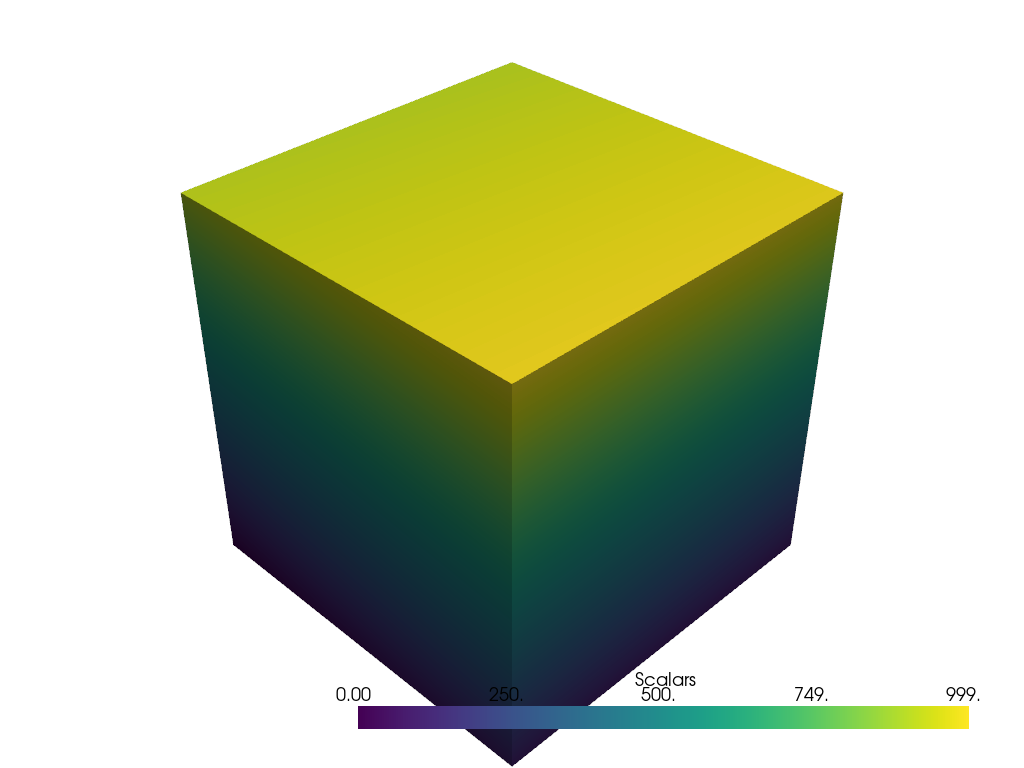

In [7]:
import pyvista as pv
import numpy as np

# Create a uniform grid
grid = pv.ImageData()

# Set grid dimensions and spacing
grid.dimensions = [10, 10, 10]  # Number of points along each axis
grid.spacing = [1, 1, 1]  # Spacing between points along each axis

# Create some scalar values (you can modify this based on your data)
scalars = np.arange(grid.n_points)

# Add the scalar values to the grid
grid["Scalars"] = scalars  # This sets scalars as a point data array

# Plot the uniform grid
plotter = pv.Plotter()
plotter.add_mesh(grid, scalars="Scalars", cmap="viridis")
plotter.show()

/home/rnga/dawezenberg/my-scratch/envseg/lib64/python3.9/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame.ui.vuetify'

Falling back to a static output.
  warnings.warn(


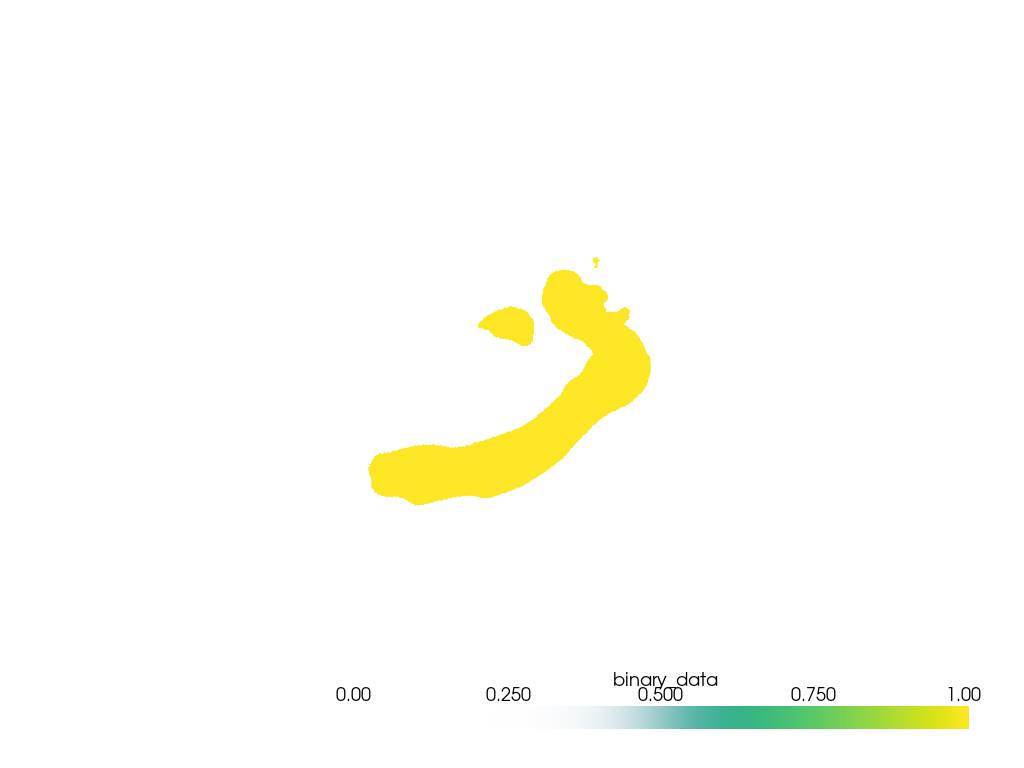

In [8]:
import nibabel as nib
import numpy as np
import pyvista as pv

# Load the NIfTI file
nifti_file_path = "/home/rnga/dawezenberg/my-scratch/outputs/scan_144_b05.nii.gz"
nifti_img = nib.load(nifti_file_path)
data = nifti_img.get_fdata()

# Assuming the data is binary, we can directly work with it
# Here, converting data to binary isn't necessary if it's already binary
# but this step is here to ensure it's in the correct format
binary_data = data > 0

# Find the dimensions and spacing based on the NIfTI file
dimensions = binary_data.shape
spacing = nifti_img.header.get_zooms()

# Create a uniform grid with the correct dimensions and spacing
# Using ImageData to represent the volumetric data
grid = pv.ImageData(dimensions=dimensions, spacing=spacing, origin=(0, 0, 0))

# Convert the binary data into a format suitable for PyVista and add it to the grid
# This step involves assigning the binary data to the grid's point data
# Flattening the array and converting to float for visualization purposes
grid.point_data["binary_data"] = binary_data.ravel(order="F").astype(np.float32)

# Plot the uniform grid using the binary data
plotter = pv.Plotter()
plotter.add_volume(grid, scalars="binary_data", cmap="viridis", opacity="sigmoid")
plotter.show()


Data Shape: (256, 256, 88)
Data Type: float64
Min Value: 0.0
Max Value: 1.0
Mean Value: 0.017370223999023438
Value counts above and below the threshold (0): {0: 5653210, 1: 113958}


/home/rnga/dawezenberg/my-scratch/envseg/lib64/python3.9/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame.ui.vuetify'

Falling back to a static output.
  warnings.warn(


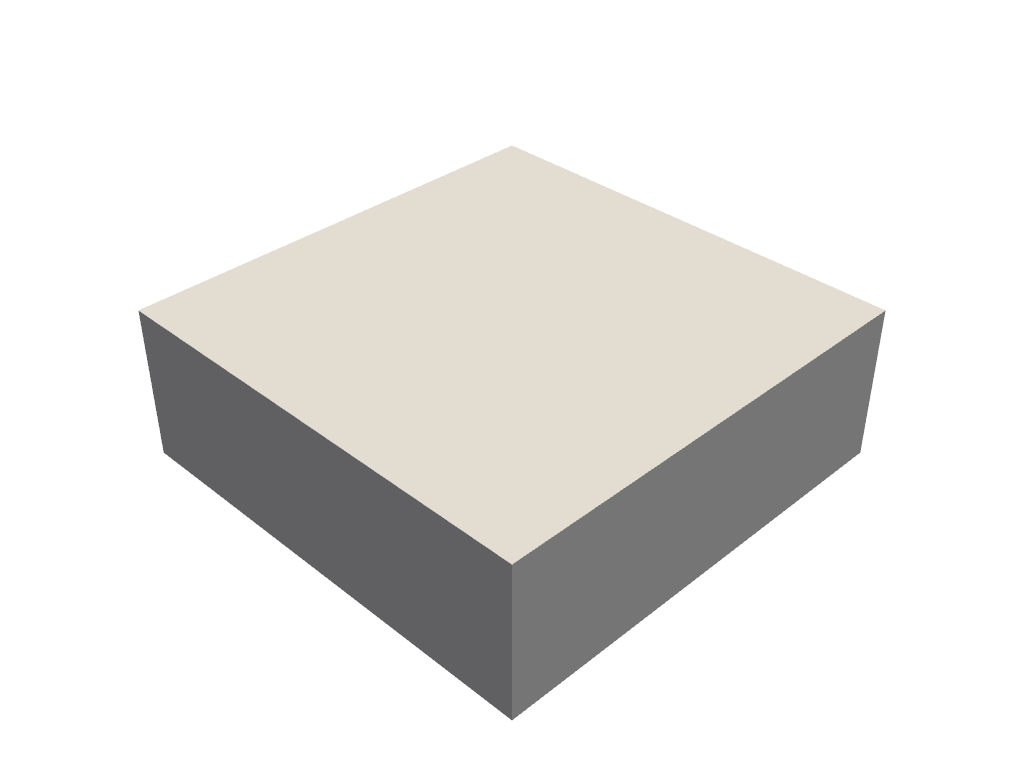

In [16]:
import nibabel as nib
import numpy as np
import pyvista as pv

# Load the NIfTI file
nifti_file_path = "/home/rnga/dawezenberg/my-scratch/outputs/scan_144_b06.nii.gz"
nifti_img = nib.load(nifti_file_path)
data = nifti_img.get_fdata()

# Inspect the loaded data
print(f"Data Shape: {data.shape}")
print(f"Data Type: {data.dtype}")
print(f"Min Value: {np.min(data)}")
print(f"Max Value: {np.max(data)}")
print(f"Mean Value: {np.mean(data)}")
unique, counts = np.unique(binary_data, return_counts=True)
value_counts = dict(zip(unique, counts))
print(f"Value counts above and below the threshold ({threshold_value}): {value_counts}")

# Use a custom threshold based on your data
threshold_value = 0  # Example: using the 50th percentile
binary_data = data > threshold_value
binary_data = binary_data.astype(np.uint8)

# Wrap the data and extract the surface
volume = pv.wrap(binary_data)
surface = volume.extract_geometry()

# Visualization
plotter = pv.Plotter()
plotter.add_mesh(surface, color='white', show_edges=False)  # Adjust visualization parameters as needed
plotter.show()


/home/rnga/dawezenberg/my-scratch/envseg/lib64/python3.9/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/rnga/dawezenberg/my-scratch/envseg/lib64/python3.9/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


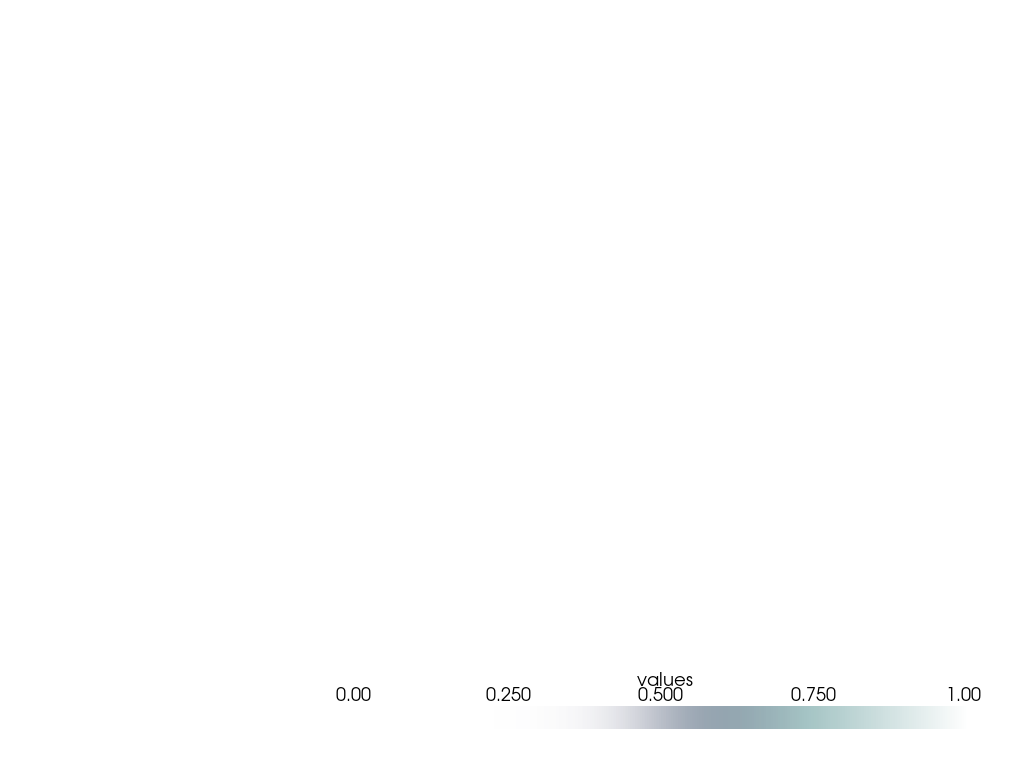

In [6]:
import nibabel as nib
import numpy as np
import pyvista as pv

# Load the NIfTI file
nifti_file_path = "/home/rnga/dawezenberg/my-scratch/outputs/gt/scan_144_b05.nii.gz"
nifti_img = nib.load(nifti_file_path)
data = nifti_img.get_fdata()

# Transpose and flip dimensions if necessary to match your visualization expectations
data = np.transpose(data, axes=(2, 1, 0))
data = np.flip(data, axis=1)

# Create a PyVista volume from the NIfTI data
volume = pv.wrap(data)

# Directly visualize the volume with PyVista
p = pv.Plotter()
p.add_volume(volume, cmap="bone", opacity="sigmoid")
p.show()
